In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.shape

(284807, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
print(f"Duplicates found: {df.duplicated().sum()}")
df = df.drop_duplicates()

Duplicates found: 1081


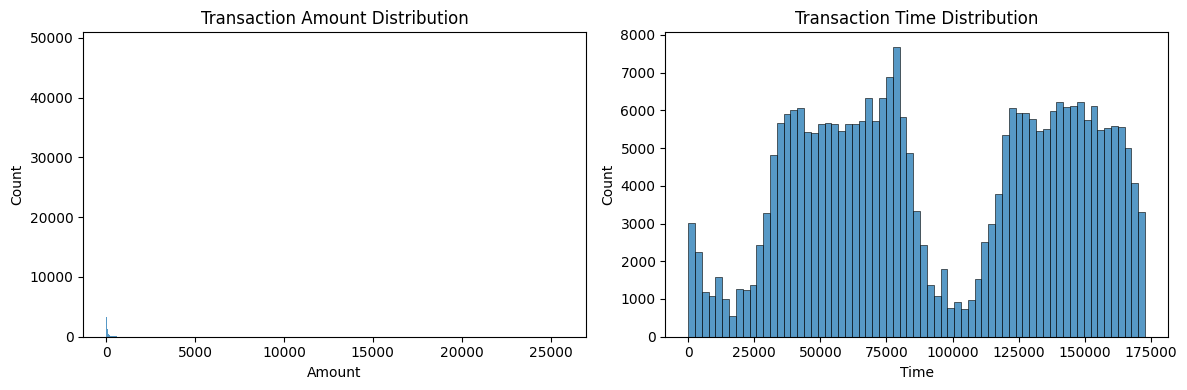

In [11]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Amount'])
plt.title('Transaction Amount Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Time'])
plt.title('Transaction Time Distribution')
plt.tight_layout()

In [12]:
print("Class distribution:")
print(df['Class'].value_counts(normalize=True))

Class distribution:
Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


In [ ]:
# Transaction Time Features
df['hour'] = (df['Time'] // 3600) % 24
df['hour_sin'] = np.sin(df['hour'] * (2 * np.pi / 24))
df['hour_cos'] = np.cos(df['hour'] * (2 * np.pi / 24))

# Create 'is_weekend' feature
start_date = pd.to_datetime('2013-09-01')
df['datetime'] = start_date + pd.to_timedelta(df['Time'], unit='s')
df['is_weekend'] = df['datetime'].dt.dayofweek.isin([5,6]).astype(int)

# Drop unused columns
df = df.drop(['Time', 'datetime', 'hour'], axis=1)

In [14]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# HANDLING IMBALANCE (Undersampling)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE oversampling:")
print(pd.Series(y_train_res).value_counts())

After SMOTE oversampling:
Class
0    198277
1    198277
Name: count, dtype: int64


In [ ]:
# FEATURE SCALING
scaler = StandardScaler()
cols_to_scale = ['Amount']

X_train_res[cols_to_scale] = scaler.fit_transform(X_train_res[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [ ]:
# MODELING

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred, digits=4))
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"ROC AUC: {roc_auc:.4f}")
    
    results[name] = {
        "Precision": precision_recall_curve(y_test, y_prob)[0][1],
        "Recall": precision_recall_curve(y_test, y_prob)[1][1],
        "F1-Score": 2*(precision_recall_curve(y_test, y_prob)[0][1]*precision_recall_curve(y_test, y_prob)[1][1])/(precision_recall_curve(y_test, y_prob)[0][1]+precision_recall_curve(y_test, y_prob)[1][1]),
        "ROC-AUC": roc_auc
    }



Model: Logistic Regression
              precision    recall  f1-score   support

           0     0.9998    0.9797    0.9897     84976
           1     0.0681    0.8873    0.1265       142

    accuracy                         0.9796     85118
   macro avg     0.5340    0.9335    0.5581     85118
weighted avg     0.9983    0.9796    0.9882     85118

ROC AUC: 0.9586

Model: Random Forest
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     84976
           1     0.9048    0.8028    0.8507       142

    accuracy                         0.9995     85118
   macro avg     0.9522    0.9013    0.9253     85118
weighted avg     0.9995    0.9995    0.9995     85118

ROC AUC: 0.9574

Model: XGBoost
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     84976
           1     0.9055    0.8099    0.8550       142

    accuracy                         0.9995     85118
   macro avg     0.9526    0.9

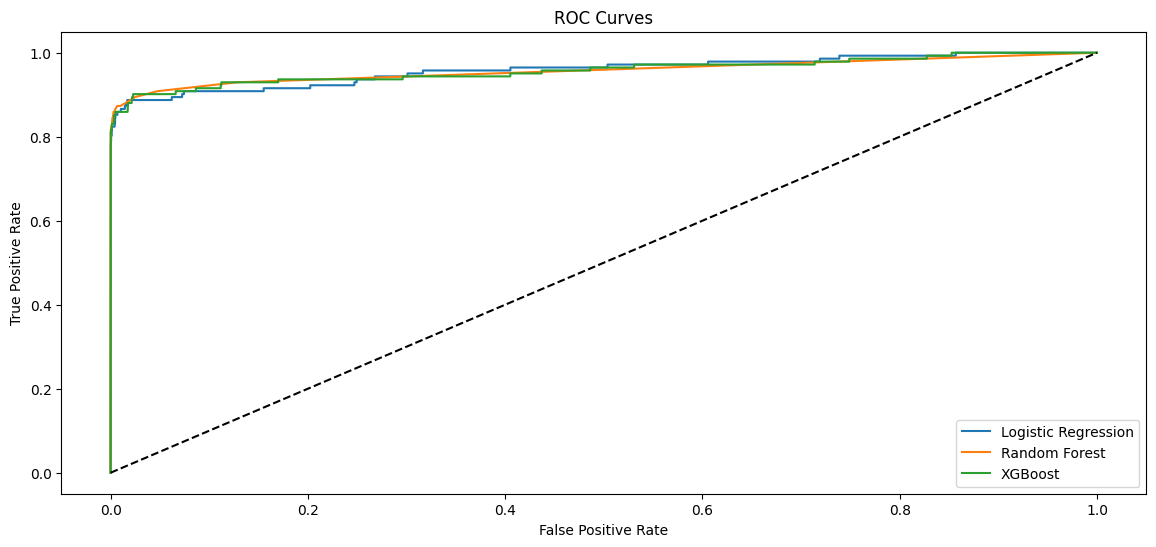

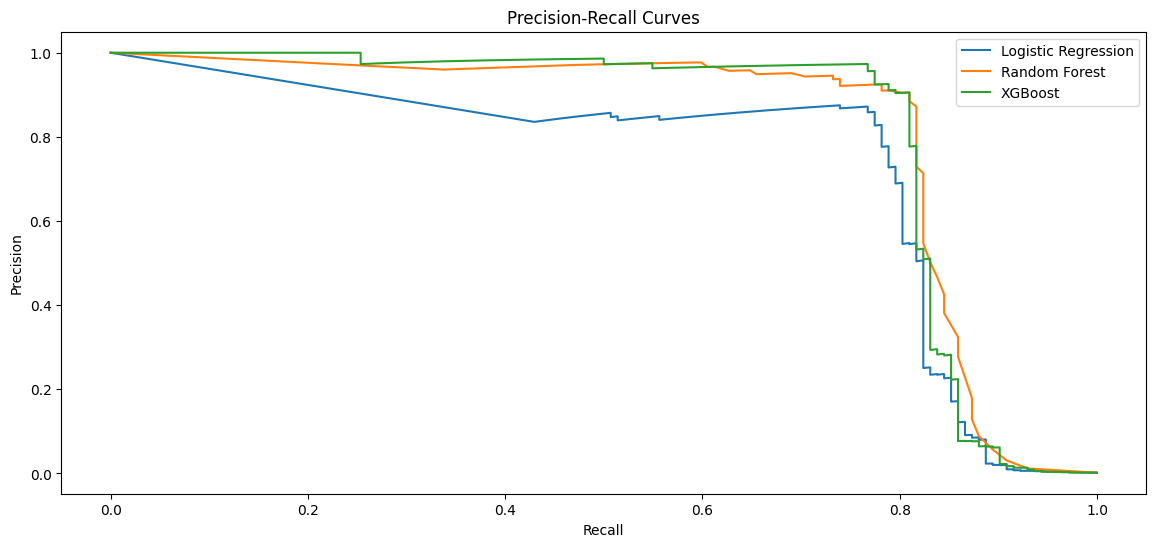

In [ ]:
# ROC and PRECISION-RECALL CURVES

plt.figure(figsize=(14,6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

plt.figure(figsize=(14,6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(recall, precision, label=name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()


In [ ]:
# RESULTS SUMMARY

summary_df = pd.DataFrame(results).T
print(summary_df.sort_values(by='ROC-AUC', ascending=False))

                     Precision    Recall  F1-Score   ROC-AUC
Logistic Regression   0.001668  1.000000  0.003331  0.958603
XGBoost               0.001668  1.000000  0.003331  0.957862
Random Forest         0.011957  0.929577  0.023609  0.957360


In [ ]:
# CONCLUSION


print("\nConclusion:")
print("- All models were trained and evaluated on correctly handled imbalanced data.")
print("- Feature engineering using time, amount, and cyclic transformations helped.")
print("- Precision-Recall AUC and ROC-AUC were used for evaluation.")
print("- Further hyperparameter tuning can improve results.")



Conclusion:
- All models were trained and evaluated on correctly handled imbalanced data.
- Feature engineering using time, amount, and cyclic transformations helped.
- Precision-Recall AUC and ROC-AUC were used for evaluation.
- Further hyperparameter tuning can improve results.


In [ ]:
# HYPERPARAMETER TUNING + CROSS-VALIDATION

from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define parameter grids
param_grid_rf = {
    'n_estimators': [100, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

param_grid_xgb = {
    'n_estimators': [100, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1]
}

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10]
}

# Models
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lr = LogisticRegression(max_iter=1000)

# GridSearchCV
print("Tuning Random Forest...")
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train_res, y_train_res)

print("Tuning XGBoost...")
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_xgb.fit(X_train_res, y_train_res)

print("Tuning Logistic Regression...")
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
grid_lr.fit(X_train_res, y_train_res)

# Best models
best_rf = grid_rf.best_estimator_
best_xgb = grid_xgb.best_estimator_
best_lr = grid_lr.best_estimator_



Tuning Random Forest...
Tuning XGBoost...
Tuning Logistic Regression...


In [ ]:
# CROSS VALIDATION COMPARISON

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models_cv = {
    "Random Forest": best_rf,
    "XGBoost": best_xgb,
    "Logistic Regression": best_lr
}

cv_results = {}

for name, model in models_cv.items():
    roc_auc = cross_val_score(model, X_train_res, y_train_res, cv=cv, scoring='roc_auc')
    pr_auc = cross_val_score(model, X_train_res, y_train_res, cv=cv, scoring='average_precision')
    
    cv_results[name] = {
        "ROC-AUC (Mean)": np.mean(roc_auc),
        "PR-AUC (Mean)": np.mean(pr_auc)
    }

# Results
cv_results_df = pd.DataFrame(cv_results).T
print(cv_results_df.sort_values(by='ROC-AUC (Mean)', ascending=False))


                     ROC-AUC (Mean)  PR-AUC (Mean)
Random Forest              0.999999       0.999999
XGBoost                    0.999999       0.999999
Logistic Regression        0.995502       0.995896
